# Model Development

## Problem Definition

### Outcome
The goal is to predict the likelihood of a person having diabetes based on various demographic, health, and lifestyle features. This binary classification problem aims to accurately classify individuals as either diabetic or non-diabetic.

### Objective
To build a predictive model that determines whether an individual has diabetes or not, using medical, lifestyle, and demographic data. The model should assist in identifying individuals at risk, potentially supporting early intervention and preventive measures.

### Target Variable
- **Diabetes_binary**: The target variable for this classification task, where:
  - **1** indicates the presence of diabetes.
  - **0** indicates the absence of diabetes.

### Features
- The model will use a combination of medical, demographic, and lifestyle features, including:
  - **Medical Features**: BMI, Blood Pressure, Glucose, and Insulin levels.
  - **Lifestyle Features**: Physical activity, smoking status, alcohol consumption, and diet.
  - **Demographic Features**: Age, sex, education level, and income.

### Evaluation Metrics
Since this is a classification task, we will assess model performance using the following metrics:

- **Accuracy**: Measures overall correctness of the model but may be limited if there’s a class imbalance.
- **Precision**: Indicates the proportion of true positive predictions (diabetic) out of all positive predictions, showing how reliable the model is in predicting diabetes.
- **Recall**: Measures the proportion of true positives identified out of all actual positives, highlighting the model’s ability to detect diabetes cases.
- **F1-score**: The harmonic mean of precision and recall, providing a balanced measure especially useful if there’s class imbalance.
- **ROC-AUC**: Reflects the trade-off between sensitivity and specificity, where a higher score (closer to 1) indicates better performance.

### Expected Outcome
By training and testing the model on this dataset, we expect to:
1. Accurately predict the diabetes status of individuals based on input features.
2. Identify key predictors that contribute to the model’s decisions.
3. Obtain a well-calibrated model that balances sensitivity and specificity, as indicated by a high ROC-AUC score.

The final model will provide a valuable tool for predicting diabetes risk, aiding in early detection and potential intervention.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

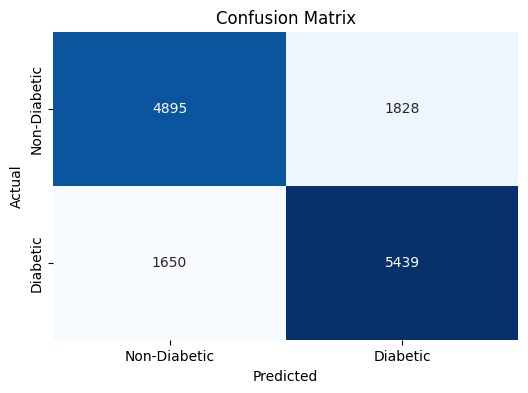


Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.75      0.73      0.74      6723
    Diabetic       0.75      0.77      0.76      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812

Baseline Model: Logistic Regression
Accuracy: 74.82%
Precision: 74.85%
Recall: 76.72%
F1 Score: 75.77%
ROC AUC Score: 74.77%


In [ ]:
"""
  Baseline Model Development

  Deliverable: Build a simple model to establish baseline performance.
  Current Recommended Model: Logistic Regression.
"""
# Load the cleaned dataset
df = pd.read_csv('cleaned_df.csv')

# Define features and target variable
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=200, solver='lbfgs')
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

# Evaluate performance and display metrics as percentages
print("Baseline Model: Logistic Regression")
print("Accuracy:", f"{accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Precision:", f"{precision_score(y_test, y_pred) * 100:.2f}%")
print("Recall:", f"{recall_score(y_test, y_pred) * 100:.2f}%")
print("F1 Score:", f"{f1_score(y_test, y_pred) * 100:.2f}%")
print("ROC AUC Score:", f"{roc_auc_score(y_test, y_pred) * 100:.2f}%")

## Baseline Model Report: Logistic Regression

## Objective
The objective of this classification problem is to predict diabetes status based on various medical and demographic features. The target variable is `Diabetes_binary`, where:
- 1 = Diabetic
- 0 = Non-Diabetic

## Model Selection

### Chosen Model: Logistic Regression
Logistic Regression was selected as the baseline model for the following reasons:

1. **Simplicity and Interpretability**: Logistic Regression is a straightforward and interpretable model. It allows us to understand initial relationships between features and the target, which is valuable at the baseline stage.
  
2. **Performance**: Logistic Regression generally performs well in binary classification tasks, especially on datasets that are well-prepared and standardized.
  
3. **Computational Efficiency**: Logistic Regression is computationally inexpensive, allowing for rapid iteration and testing during the initial phases of model development.
  
4. **Compatibility with Evaluation Metrics**: Logistic Regression works effectively with metrics commonly used in classification, such as accuracy, precision, recall, F1-score, and ROC-AUC.

### Alternative Baseline Models
While Logistic Regression is a strong choice for the baseline, here are other models that could serve as potential baselines:

1. **Decision Tree**: Provides insight into feature importance and can handle non-linear relationships but may overfit without tuning.
2. **k-Nearest Neighbors (k-NN)**: A simple model that doesn't assume any specific distribution but may be computationally slow for larger datasets.
3. **Naive Bayes**: Useful for cases where feature independence is assumed, and it can provide strong results for some datasets.
4. **Dummy Classifier**: Predicting the majority class as a minimal baseline to ensure real models outperform this.

## Evaluation Metrics

The following metrics were used to evaluate the baseline model's performance:
- **Accuracy**: Measures the overall correctness of the model's predictions.
- **Precision**: Indicates the proportion of true positives out of all positive predictions.
- **Recall**: Reflects the model's ability to identify all true positives.
- **F1 Score**: The harmonic mean of precision and recall, balancing the two metrics.
- **ROC AUC**: A measure of the trade-off between sensitivity and specificity, providing a score between 0.5 and 1.

## Model Performance

### Confusion Matrix

|             | Predicted: Non-Diabetic | Predicted: Diabetic |
|-------------|--------------------------|----------------------|
| Actual: Non-Diabetic | 4895                 | 1828                 |
| Actual: Diabetic     | 1650                 | 5439                 |

### Classification Report

| Class           | Precision | Recall | F1-Score | Support |
|-----------------|-----------|--------|----------|---------|
| Non-Diabetic    | 0.75      | 0.73   | 0.74     | 6723    |
| Diabetic        | 0.75      | 0.77   | 0.76     | 7089    |
| **Accuracy**    |           |        | **0.75** | **13812** |
| **Macro Avg**   | 0.75      | 0.75   | 0.75     | 13812   |
| **Weighted Avg**| 0.75      | 0.75   | 0.75     | 13812   |

### Summary of Baseline Performance

- **Accuracy**: 74.82%
- **Precision**: 74.85%
- **Recall**: 76.72%
- **F1 Score**: 75.77%
- **ROC AUC Score**: 74.77%

## Conclusion
The Logistic Regression model provided a strong baseline performance with an accuracy of 74.82% and a balanced precision-recall trade-off. The recall is slightly higher for the Diabetic class, which indicates the model's slight tendency to prioritize identifying diabetic cases. This baseline gives a solid foundation, and further improvements can be pursued by exploring more complex models or fine-tuning logistic regression parameters.

# **Baseline Model Development**

#SVM

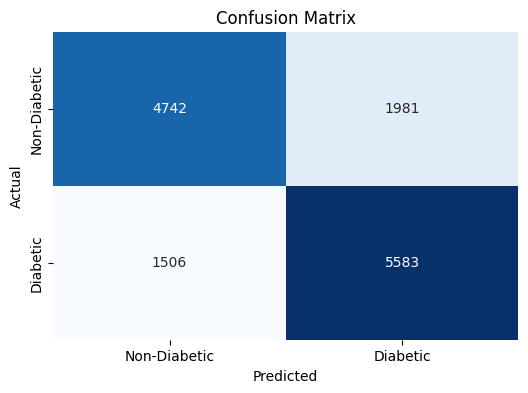


Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.76      0.71      0.73      6723
    Diabetic       0.74      0.79      0.76      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812

Baseline Model: Support Vector Machine
Accuracy: 74.75%
Precision: 73.81%
Recall: 78.76%
F1 Score: 76.20%
ROC AUC Score: 82.09%


In [ ]:
df = pd.read_csv('cleaned_df.csv')

# Define features and target variable
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

# Evaluate performance and display metrics as percentages
print("Baseline Model: Support Vector Machine")
print("Accuracy:", f"{accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Precision:", f"{precision_score(y_test, y_pred) * 100:.2f}%")
print("Recall:", f"{recall_score(y_test, y_pred) * 100:.2f}%")
print("F1 Score:", f"{f1_score(y_test, y_pred) * 100:.2f}%")
print("ROC AUC Score:", f"{roc_auc_score(y_test, svm_model.decision_function(X_test)) * 100:.2f}%")

**SVM Analysis:**

Basline Performance:

- **Accuracy**: 74.75%
- **Precision**: 73.81%
- **Recall**: 78.76%
- **F1 Score**: 76.20%
- **ROC AUC Score**: 82.09%

SVM contained intriguing results. However, since runtime is lengthy, proceeding with this model seems unlikely.

# Random Forest

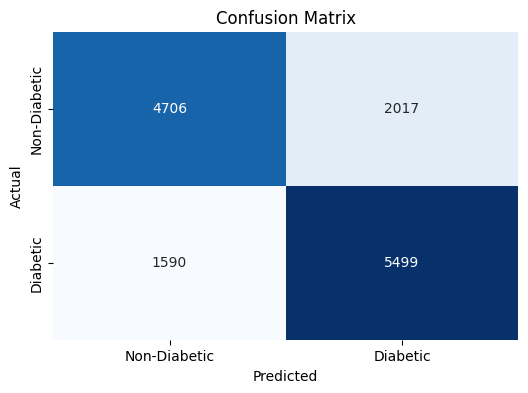


Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.75      0.70      0.72      6723
    Diabetic       0.73      0.78      0.75      7089

    accuracy                           0.74     13812
   macro avg       0.74      0.74      0.74     13812
weighted avg       0.74      0.74      0.74     13812

Random Forest Model
Accuracy: 73.89%
Precision: 73.16%
Recall: 77.57%
F1 Score: 75.30%
ROC AUC Score: 80.12%


In [ ]:
df = pd.read_csv('cleaned_df.csv')

# Define features and target variable
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model with the specified parameters
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

# Evaluate performance and display metrics as percentages
print("Random Forest Model")
print("Accuracy:", f"{accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Precision:", f"{precision_score(y_test, y_pred) * 100:.2f}%")
print("Recall:", f"{recall_score(y_test, y_pred) * 100:.2f}%")
print("F1 Score:", f"{f1_score(y_test, y_pred) * 100:.2f}%")
print("ROC AUC Score:", f"{roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]) * 100:.2f}%")

**Random Forests Analysis:**

Basline Performance:

- **Accuracy**: 73.89%
- **Precision**: 73.16%
- **Recall**: 77.57%
- **F1 Score**: 75.30%
- **ROC AUC Score**: 80.12%

Random Forests has okay baseline results. However due to Random Forests high customizability and decent run time, this model is likely to receive hyperparameter tuning.

# XGBoost

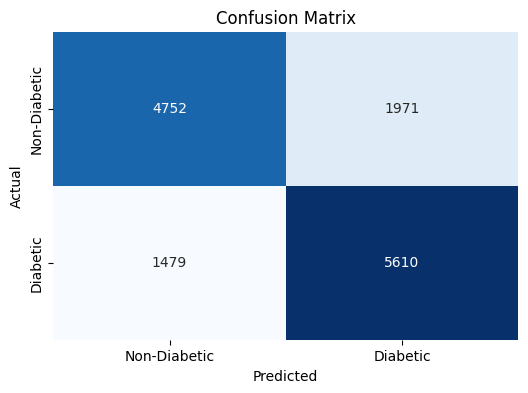


Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.76      0.71      0.73      6723
    Diabetic       0.74      0.79      0.76      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812

XGBoost Model
Accuracy: 75.02%
Precision: 74.00%
Recall: 79.14%
F1 Score: 76.48%
ROC AUC Score: 82.53%


In [ ]:
# Load the dataset
df = pd.read_csv('cleaned_df.csv')

# Define features and target variable
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

# Evaluate performance and display metrics as percentages
print("XGBoost Model")
print("Accuracy:", f"{accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Precision:", f"{precision_score(y_test, y_pred) * 100:.2f}%")
print("Recall:", f"{recall_score(y_test, y_pred) * 100:.2f}%")
print("F1 Score:", f"{f1_score(y_test, y_pred) * 100:.2f}%")
print("ROC AUC Score:", f"{roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]) * 100:.2f}%")


**XGBoost Analysis:**

Basline Performance:

- **Accuracy**: 75.02%
- **Precision**: 74.00%
- **Recall**: 79.14%
- **F1 Score**: 76.48%
- **ROC AUC Score**: 82.53%

XGBoost contains our most promising baseline results. The run time is very fast and the hyperparameters allow for high customizability. Great bias towards recall and will proceed with hyperparamter tuning.

# **Further Model Development**

The two models which we will proceed with for hyperparameter training are XGBoost and Random Forests. We feel as these are the best two models as they are very customizeable, and do not take a significant time to run. Grid search was used, but also hyperparameters were changed by hand based on quick testing.

# Random Forests Hyperparameter Training

In [ ]:
# Load the dataset
df = pd.read_csv('cleaned_df.csv')

# Define features and target variable
X = df.drop(columns=['Diabetes_binary'])  # Replace with the actual target variable name if different
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15, 18],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='f1', cv=3, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Display the best parameters of the model
print("\nBest Parameters for Random Forest Model:")
print(grid_search.best_params_)

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

# Evaluate performance and display metrics as percentages
print("\nBest Random Forest Model Performance Metrics:")
print("Accuracy:", f"{accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Precision:", f"{precision_score(y_test, y_pred) * 100:.2f}%")
print("Recall:", f"{recall_score(y_test, y_pred) * 100:.2f}%")
print("F1 Score:", f"{f1_score(y_test, y_pred) * 100:.2f}%")
print("ROC AUC Score:", f"{roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]) * 100:.2f}%")


Fitting 3 folds for each of 72 candidates, totalling 216 fits

Best Parameters for Random Forest Model:
{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.77      0.71      0.74      6723
    Diabetic       0.75      0.80      0.77      7089

    accuracy                           0.76     13812
   macro avg       0.76      0.76      0.76     13812
weighted avg       0.76      0.76      0.76     13812


Best Random Forest Model Performance Metrics:
Accuracy: 75.66%
Precision: 74.65%
Recall: 79.62%
F1 Score: 77.05%
ROC AUC Score: 82.75%


Best Model:

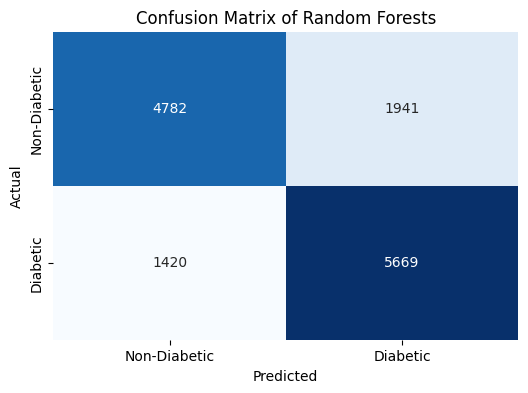


Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.77      0.71      0.74      6723
    Diabetic       0.74      0.80      0.77      7089

    accuracy                           0.76     13812
   macro avg       0.76      0.76      0.76     13812
weighted avg       0.76      0.76      0.76     13812

Random Forest Model
Accuracy: 75.67%
Precision: 74.49%
Recall: 79.97%
F1 Score: 77.13%
ROC AUC Score: 82.62%


In [ ]:
df = pd.read_csv('cleaned_df.csv')

# Define features and target variable
X = df.drop(columns=['Diabetes_binary'])  # Replace with the actual target variable name if different
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model with the specified parameters
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=18,
    min_samples_leaf=1,
    min_samples_split=10,
    random_state=42
)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Forests")
plt.show()

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

# Evaluate performance and display metrics as percentages
print("Random Forest Model")
print("Accuracy:", f"{accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Precision:", f"{precision_score(y_test, y_pred) * 100:.2f}%")
print("Recall:", f"{recall_score(y_test, y_pred) * 100:.2f}%")
print("F1 Score:", f"{f1_score(y_test, y_pred) * 100:.2f}%")
print("ROC AUC Score:", f"{roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]) * 100:.2f}%")

**Random Forests Analysis:**

Hyperparameter Tuned Performance:

- **Accuracy**: 75.67%
- **Precision**: 74.49%
- **Recall**: 79.97%
- **F1 Score**: 77.13%
- **ROC AUC Score**: 82.62%

Hyperparamter tuning resulted in decent improvements in every metric. Will determine which model to proceed with after XGBoost tuning.

# XGBoost Hyperparameter Training

In [ ]:
# Load the dataset
df = pd.read_csv('cleaned_df.csv')

# Define features and target variable
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='f1', cv=3, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Display the best parameters of the model
print("\nBest Parameters for XGBoost Model:")
print(grid_search.best_params_)

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

# Evaluate performance and display metrics as percentages
print("\nBest XGBoost Model Performance Metrics:")
print("Accuracy:", f"{accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Precision:", f"{precision_score(y_test, y_pred) * 100:.2f}%")
print("Recall:", f"{recall_score(y_test, y_pred) * 100:.2f}%")
print("F1 Score:", f"{f1_score(y_test, y_pred) * 100:.2f}%")
print("ROC AUC Score:", f"{roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]) * 100:.2f}%")


Not satisfied with results from this grid search. Will take 2 steps in identifying the best XGBoost model below using more precise tuning on most important hyperparmaters.

Step 1: Learning Rate

In [ ]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_df.csv')

# Define features and target variable
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize results list
results = []

# Loop through subsample values from 0.1 to 1.0 with step size 0.1
for subsample in [x * 0.1 for x in range(1, 11)]:
    # Loop through learning rates from 0.05 to 0.15 with step size 0.001
    for learning_rate in [x * 0.001 for x in range(50, 151)]:
        # Initialize the XGBoost Classifier with the current learning rate and subsample
        xgb = XGBClassifier(
            n_estimators=100,
            learning_rate=learning_rate,
            max_depth=6,
            subsample=subsample,
            colsample_bytree=0.8,
            random_state=42,
            eval_metric='logloss'
        )

        # Train the XGBoost model
        xgb.fit(X_train, y_train)

        # Predict on the test set
        y_pred = xgb.predict(X_test)

        # Calculate F1 score and save results
        f1 = f1_score(y_test, y_pred)
        results.append((learning_rate, subsample, f1))

# Find and display the best combination
best_result = max(results, key=lambda x: x[2])
best_learning_rate, best_subsample, best_f1 = best_result
print(f"Best Learning Rate: {best_learning_rate:.3f}, Best Subsample: {best_subsample:.1f}, F1 Score: {best_f1:.4f}")

Step 2:

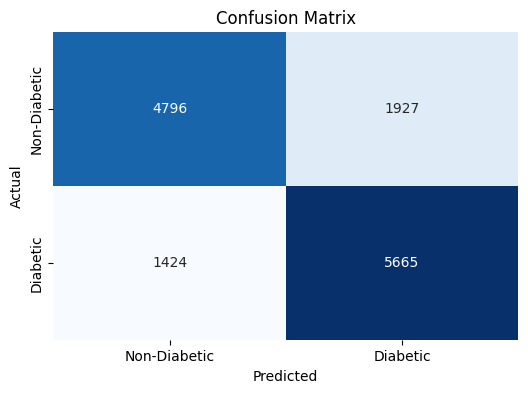


Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.77      0.71      0.74      6723
    Diabetic       0.75      0.80      0.77      7089

    accuracy                           0.76     13812
   macro avg       0.76      0.76      0.76     13812
weighted avg       0.76      0.76      0.76     13812

XGBoost Model
Accuracy: 75.74%
Precision: 74.62%
Recall: 79.91%
F1 Score: 77.17%
ROC AUC Score: 83.12%


In [ ]:
# Load the dataset
df = pd.read_csv('cleaned_df.csv')

# Define features and target variable
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.075,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
    )

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

# Evaluate performance and display metrics as percentages
print("XGBoost Model")
print("Accuracy:", f"{accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Precision:", f"{precision_score(y_test, y_pred) * 100:.2f}%")
print("Recall:", f"{recall_score(y_test, y_pred) * 100:.2f}%")
print("F1 Score:", f"{f1_score(y_test, y_pred) * 100:.2f}%")
print("ROC AUC Score:", f"{roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]) * 100:.2f}%")


**XGBoost Analysis:**

Hyperparameter Tuned Performance:

- **Accuracy**: 75.74%
- **Precision**: 74.62%
- **Recall**: 79.91%
- **F1 Score**: 77.17%
- **ROC AUC Score**: 83.12%



# **Final Model: XGBoost**

### Reasons for selecting XGBoost:

1. **Performance**: XGBoost often outperforms other models in binary classification tasks due to its ability to model complex relationships and handle imbalanced datasets effectively.

2. **Flexibility**: XGBoost provides a wide range of hyperparameters, enabling the model to be fine-tuned for optimal performance.

3. **Efficiency**: The implementation of XGBoost is highly optimized for speed and scalability, making it ideal for both small and large datasets.

4. **Feature Importance**: XGBoost provides insights into feature contributions, making the model interpretable despite its complexity.


## Evaluation Metrics

The following metrics were used to evaluate the baseline model's performance:
- **Accuracy**: Measures the overall correctness of the model's predictions.
- **Precision**: Indicates the proportion of true positives out of all positive predictions.
- **Recall**: Reflects the model's ability to identify all true positives.
- **F1 Score**: The harmonic mean of precision and recall, balancing the two metrics.
- **ROC AUC**: A measure of the trade-off between sensitivity and specificity, providing a score between 0.5 and 1.

## Model Performance

### Confusion Matrix

|             | Predicted: Non-Diabetic | Predicted: Diabetic |
|-------------|--------------------------|----------------------|
| Actual: Non-Diabetic | 4796                 | 1927                 |
| Actual: Diabetic     | 1424                 | 5665                 |

### Summary of Tuned Model Performance

- **Accuracy**: 75.74%
- **Precision**: 74.62%
- **Recall**: 79.91%
- **F1 Score**: 77.17%
- **ROC AUC Score**: 83.12%

## Conclusion
The XGBoost model outperformed all of the other models evaluated during development above. It was able to achieve a desireable F1-score comparatively to other models. We are happy with its bias towards recall as this is a medical diagnosis model, making recall an important metric. This performance demonstrates that XGBoost is a strong candidate for deployment, though further refinement and testing could lead to even greater improvements.